In [1]:
# importing libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#import geopandas as gpd
from datetime import datetime, timedelta
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_excel('regression_data.xls')
data.head()

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520 2014-10-13         3       1.00         1180      5650     1.0   
1  6414100192 2014-12-09         3       2.25         2570      7242     2.0   
2  5631500400 2015-02-25         2       1.00          770     10000     1.0   
3  2487200875 2014-12-09         4       3.00         1960      5000     1.0   
4  1954400510 2015-02-18         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000

### Data Exploration

 we will explore our data through descriptive statistics, missinngness analysis, outliers analysis, skewness

In [3]:
data.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

In [4]:
data.info() # there is no NAN in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

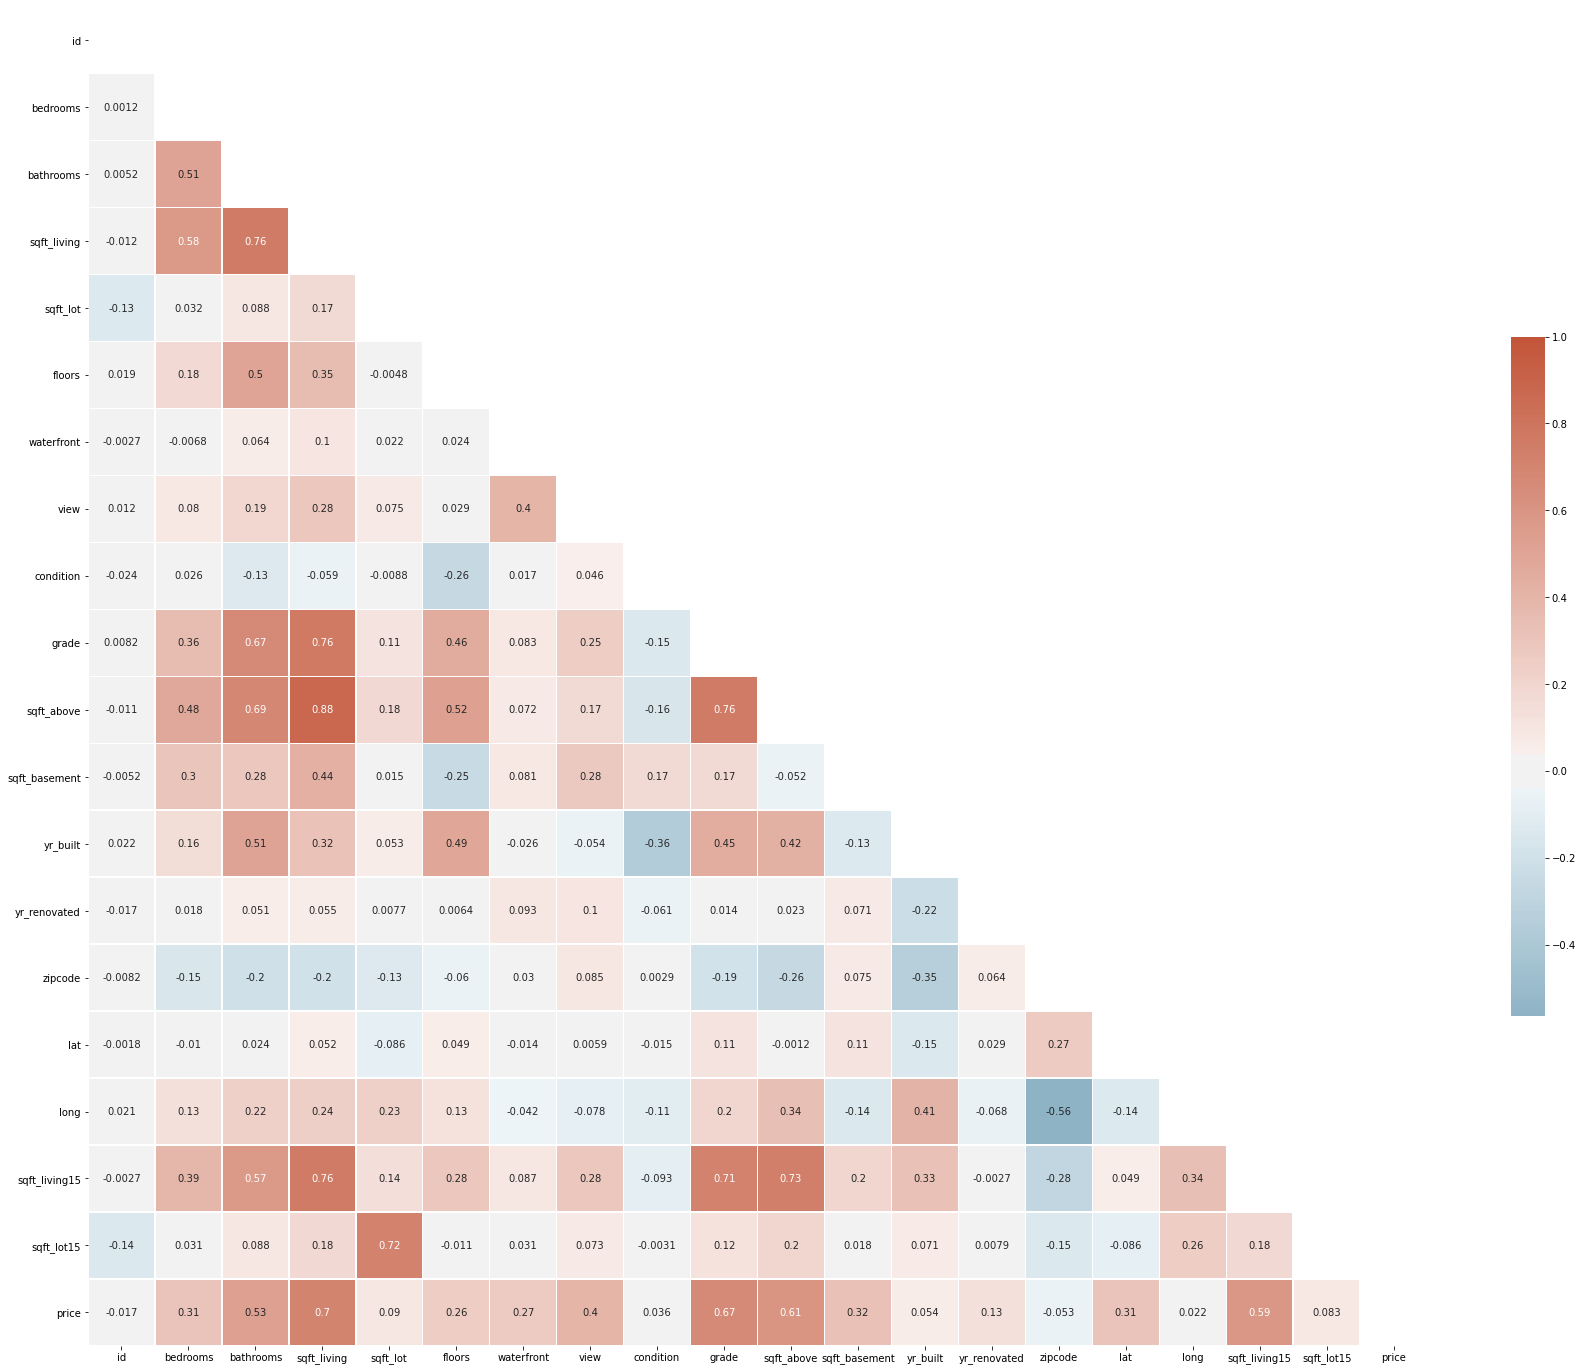

In [5]:
# correlation between features:
f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

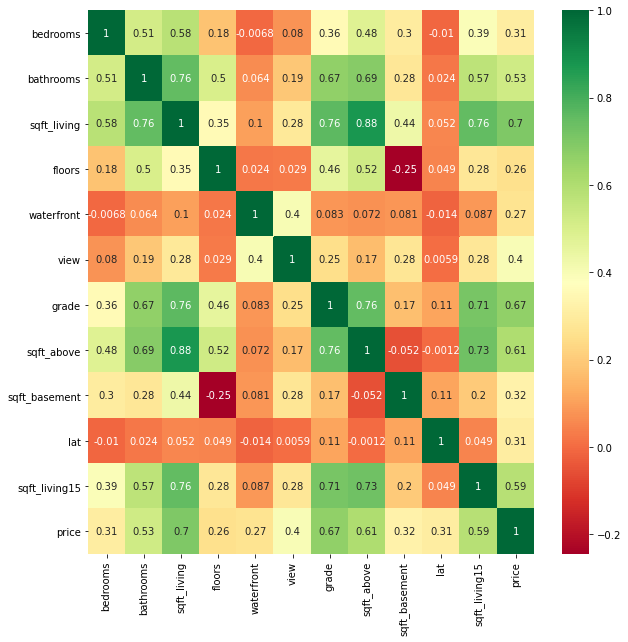

In [6]:
# Features with correlation higher than 0.5
corr=data.corr()
high_corr_features = corr.index[abs(corr['price'])>0.2]
plt.figure(figsize=(10,10))
sns.heatmap(data[high_corr_features].corr(), annot=True,cmap="RdYlGn")
plt.show()

data_importance = data.copy()

y_importance = data_importance ['price']

x_importance = data_importance.drop(['price', 'date'], axis=1)
# splitting data to training and test sets
x_train_imp, x_test_imp, y_train_imp, y_test_imp = train_test_split(x_importance,y_importance, test_size= 0.20, random_state=100)
rfr = RandomForestRegressor(n_estimators=100)
rfr_model = rfr.fit(x_train_imp, y_train_imp)
feat_imp = rfr_model.feature_importances_

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_importance.columns, feat_imp):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})


importances = importances.sort_values(['importance'], ascending=[False]).iloc[:20]
importances.plot(kind='bar', rot=47, figsize=(12,7), color='orange', edgecolor='black', alpha=0.8, fontsize=15)
plt.ylabel('Random Forest feature importance', fontsize = 20)
importances.set_xticklabels(fontsize=20)

In [7]:
data['price']

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21597, dtype: int64

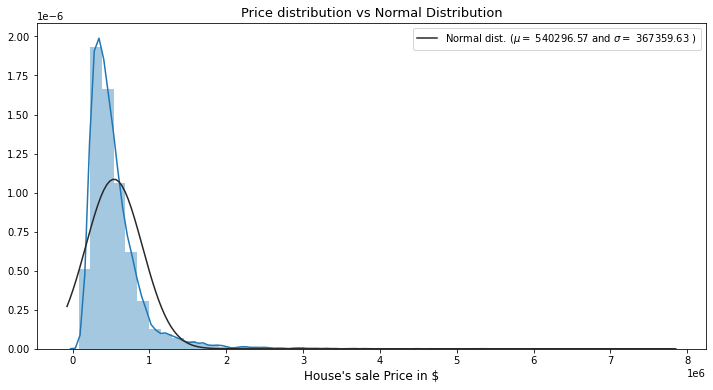

In [8]:
#checking distribution of target (price)
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax
# Getting the main parameters of the Normal Ditribution ()
(mu, sigma) = norm.fit(data['price'])
plt.figure(figsize = (12,6))
sns.distplot(data['price'], kde = True, hist=True, fit = norm)
plt.title('Price distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show() # the target is clearly skewed

Plotting high correlated features with price: sqft_living, grade 

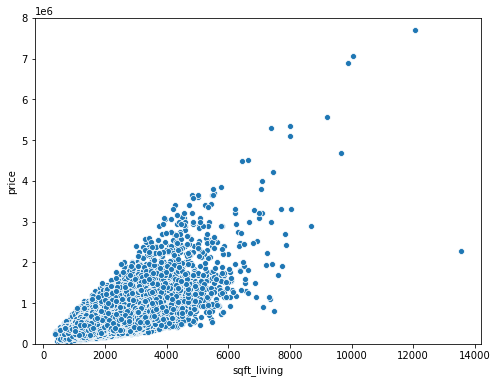

In [9]:
#looking at the Price versus sqft_living, pearson=0.8  
d = pd.concat([data['price'], data['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=data['sqft_living'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

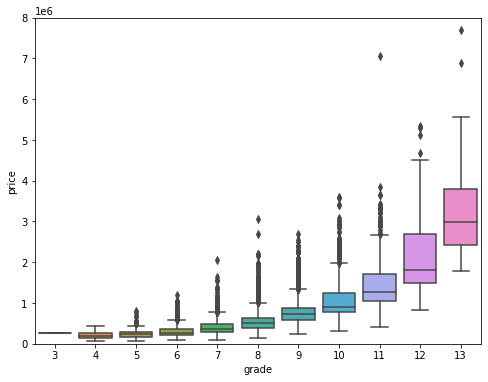

In [10]:
#looking at the Price versus grade, pearson=0.8  
d = pd.concat([data['price'], data['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=data['grade'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

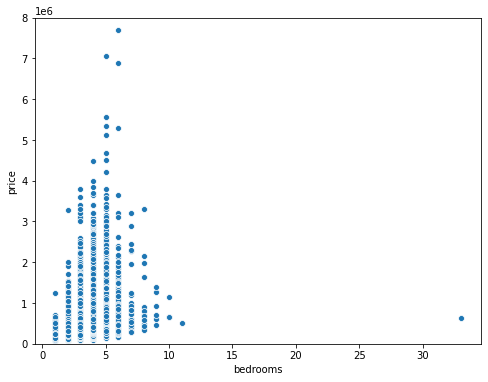

In [11]:
#looking at the Price versus number of bedrooms, pearson=0.8  
d = pd.concat([data['price'], data['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=data['bedrooms'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

In [12]:
fig = px.scatter_mapbox(data,
                        lat="lat", lon="long",
                        size="price",
                        color="price",
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        size_max=10, zoom=9,
                        mapbox_style="open-street-map",
                        center={"lat": 47.5, "lon": -122.0})

fig.show()

In [13]:
# Check NaN values per column.
def nulls_data(df):
    nulls_df = pd.DataFrame(round(df.isna().sum()/len(df)*100,2))
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name', '%_null_values'] 
    return nulls_df
nulls_data(data)

header_name  %_null_values
0              id            0.0
1            date            0.0
2        bedrooms            0.0
3       bathrooms            0.0
4     sqft_living            0.0
5        sqft_lot            0.0
6          floors            0.0
7      waterfront            0.0
8            view            0.0
9       condition            0.0
10          grade            0.0
11     sqft_above            0.0
12  sqft_basement            0.0
13       yr_built            0.0
14   yr_renovated            0.0
15        zipcode            0.0
16            lat            0.0
17           long            0.0
18  sqft_living15            0.0
19     sqft_lot15            0.0
20          price            0.0

# checking collinearity
#sns.pairplot(data)

In [14]:
# after checking the results of correlation matrix, Random forest feature importance and multicollinearity between some attributes, the following features are selected for modeling.
# ['bedrooms', 'bathrooms', 'sqft_living', 'floors','grade','lat', 'sqft_living15', 'price']

In [15]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [16]:
# so, the following columns are removed  because of the low correlation with target or multi collinearity.
data = data.drop(['id','date','waterfront', 'condition','sqft_lot','sqft_lot15','sqft_above','view','sqft_basement','yr_built', 'yr_renovated', 'sqft_living15','zipcode','long'],axis=1)


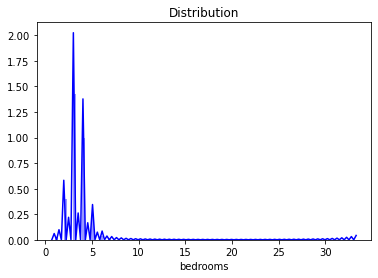

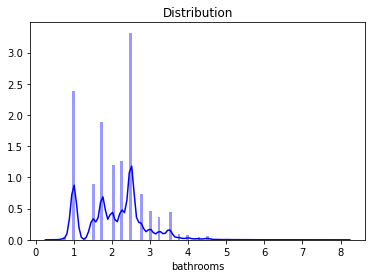

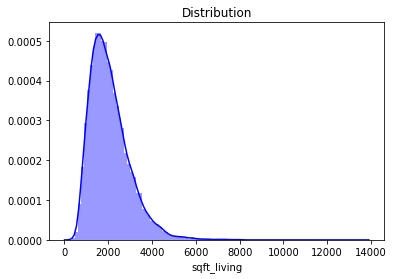

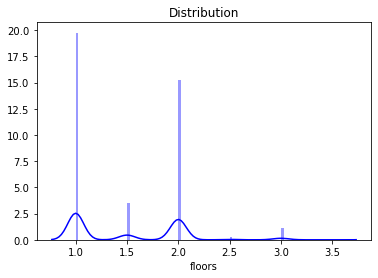

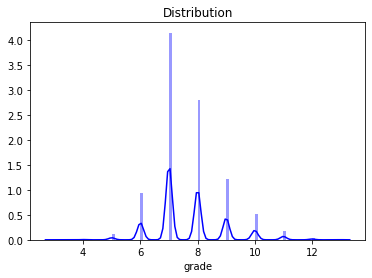

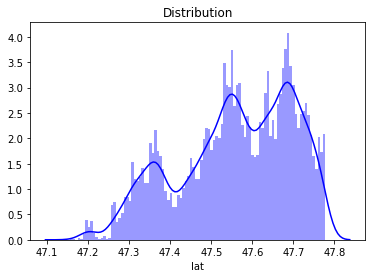

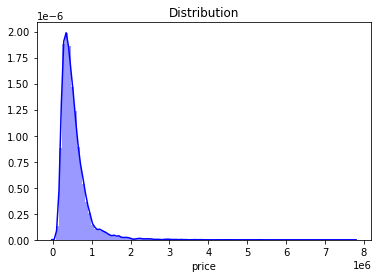

In [17]:
#Now we will try to check the normality of the numerical variables visually
#seaborn library is used to construct distribution plots for the numerical variables
columns = data.columns
for col in columns:
    sns.distplot(data[col],bins= 100, 
                   color = 'blue')
    plt.title('Distribution')
    plt.show()

In [18]:
def continuous_discrete(df):
    numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
    continuos = []
    discrete = []
    for col in numerical_columns:
        if df[col].nunique() / len(df[col]) <= 0.014:
            discrete.append(col)
        else:
            continuos.append(col)
    return df[continuos], df[discrete]  
    

In [19]:
cont, disc = continuous_discrete(data)

In [20]:
cont

sqft_living      lat   price
0             1180  47.5112  221900
1             2570  47.7210  538000
2              770  47.7379  180000
3             1960  47.5208  604000
4             1680  47.6168  510000
...            ...      ...     ...
21592         1530  47.6993  360000
21593         2310  47.5107  400000
21594         1020  47.5944  402101
21595         1600  47.5345  400000
21596         1020  47.5941  325000

[21597 rows x 3 columns]

In [21]:
disc

bedrooms  bathrooms  floors  grade
0             3       1.00     1.0      7
1             3       2.25     2.0      7
2             2       1.00     1.0      6
3             4       3.00     1.0      7
4             3       2.00     1.0      8
...         ...        ...     ...    ...
21592         3       2.50     3.0      8
21593         4       2.50     2.0      8
21594         2       0.75     2.0      7
21595         3       2.50     2.0      8
21596         2       0.75     2.0      7

[21597 rows x 4 columns]

In [22]:
cont.columns

Index(['sqft_living', 'lat', 'price'], dtype='object')

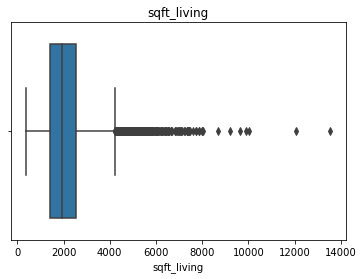

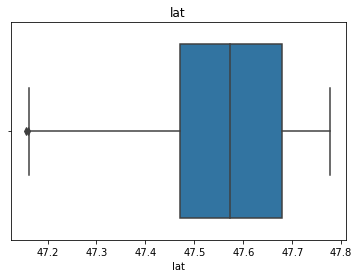

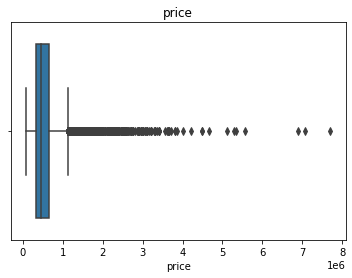

In [23]:
# the outliers are found using box plot
continuous_columns = ['sqft_living','lat', 'price']
for col in continuous_columns:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

Outliers in sqft_living should be handeled!

In [24]:
# function for removing outliers 
def fix_outlier(df,col):
    iqr=np.percentile(df[col],75)-np.percentile(df[col],25)
    upper_limit=np.percentile(df[col],75) + 1.5*iqr
    lower_limit=np.percentile(df[col],75) -1.5*iqr
    df = df [(df[col] > lower_limit) & (df[col] < upper_limit)]
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    return df

In [25]:
data = fix_outlier(data,'sqft_living')
data.shape

(20249, 7)

In [26]:
data_org = data.copy()

In [27]:
# there is outliers in the target, making two buckets of dataset according to the target range to test linear regression on that later
data1 = fix_outlier(data_org,'price')
data1.shape

(19179, 7)

In [28]:

data2 = data_org[~data_org.isin(data1)].dropna()
data2.shape

(5823, 7)

In [29]:
data2

bedrooms  bathrooms  sqft_living  floors  grade      lat      price
19          3.0       2.75       3050.0     1.0    9.0  47.5316  2000000.0
20          5.0       2.50       2270.0     2.0    8.0  47.3266   285000.0
21          2.0       1.50       1070.0     1.0    7.0  47.3533   252700.0
26          3.0       1.75       1520.0     1.0    7.0  47.6950   438000.0
28          3.0       2.50       2320.0     2.0    8.0  47.5391   580500.0
...         ...        ...          ...     ...    ...      ...        ...
20244       3.0       2.50       1530.0     3.0    8.0  47.6993   360000.0
20245       4.0       2.50       2310.0     2.0    8.0  47.5107   400000.0
20246       2.0       0.75       1020.0     2.0    7.0  47.5944   402101.0
20247       3.0       2.50       1600.0     2.0    8.0  47.5345   400000.0
20248       2.0       0.75       1020.0     2.0    7.0  47.5941   325000.0

[5823 rows x 7 columns]

In [30]:
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'lat',
       'price'],
      dtype='object')

In [31]:
# The distribution of the most features show their skewness. now checking skewness
# Checking skewness of the features
skewed_features = data.apply(lambda x:stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew value' :skewed_features})
skewness

Skew value
bedrooms       2.485907
price          2.219759
grade          0.688536
sqft_living    0.661491
floors         0.611028
bathrooms      0.167479
lat           -0.472859

In [32]:
# Fixing skewness of the features using log_transformation for skewness greater than 0.5
skewed_features = data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
high_skew

bedrooms       2.485907
price          2.219759
grade          0.688536
sqft_living    0.661491
floors         0.611028
dtype: float64

In [33]:
skew_index

Index(['bedrooms', 'price', 'grade', 'sqft_living', 'floors'], dtype='object')

In [34]:
# Fixing skewness by defining a function to perform log_transform on skewed data
# first I will try different models without fixing skewness of target (price) and later I will check applying models after handeling it

def skew_fix (df, cols):
    for col in cols:
        df[col] = np.log(df[col])
    return df

In [35]:
high_skew_index = ['bedrooms','grade', 'sqft_living']
house_data = skew_fix (data,high_skew_index)
house_data.rename(columns={'bedrooms': 'bedrooms_log','floors': 'floors_log','sqft_living': 'sqft_living_log', 'grade': 'grade_log'}, inplace = True)
house_data

bedrooms_log  bathrooms  sqft_living_log  floors_log  grade_log  \
0          1.098612       1.00         7.073270         1.0   1.945910   
1          1.098612       2.25         7.851661         2.0   1.945910   
2          1.386294       3.00         7.580700         1.0   1.945910   
3          1.098612       2.00         7.426549         1.0   2.079442   
4          1.098612       2.25         7.447168         2.0   1.945910   
...             ...        ...              ...         ...        ...   
20244      1.098612       2.50         7.333023         3.0   2.079442   
20245      1.386294       2.50         7.745003         2.0   2.079442   
20246      0.693147       0.75         6.927558         2.0   1.945910   
20247      1.098612       2.50         7.377759         2.0   2.079442   
20248      0.693147       0.75         6.927558         2.0   1.945910   

           lat   price  
0      47.5112  221900  
1      47.7210  538000  
2      47.5208  604000  
3      47.6168  510000  
4      47.3097  257500  
...        ...     ...  
20244  47.6993  360000  
20245  47.5107  400000  
20246  47.5944  402101  
20247  47.5345  400000  
20248  47.5941  325000  

[20249 rows x 7 columns]

In [36]:
# doing the same and handeling skewness for data1 and data 2( two buckets for checking linear regression)
data1 = skew_fix (data1,high_skew_index)
data1.rename(columns={'bedrooms': 'bedrooms_log','sqft_living': 'sqft_living_log','floors': 'floors_log', 'grade': 'grade_log'}, inplace = True)
data1

bedrooms_log  bathrooms  sqft_living_log  floors_log  grade_log  \
0          1.098612       1.00         7.073270         1.0   1.945910   
1          1.098612       2.25         7.851661         2.0   1.945910   
2          1.386294       3.00         7.580700         1.0   1.945910   
3          1.098612       2.00         7.426549         1.0   2.079442   
4          1.098612       2.25         7.447168         2.0   1.945910   
...             ...        ...              ...         ...        ...   
19174      1.098612       2.50         7.333023         3.0   2.079442   
19175      1.386294       2.50         7.745003         2.0   2.079442   
19176      0.693147       0.75         6.927558         2.0   1.945910   
19177      1.098612       2.50         7.377759         2.0   2.079442   
19178      0.693147       0.75         6.927558         2.0   1.945910   

           lat   price  
0      47.5112  221900  
1      47.7210  538000  
2      47.5208  604000  
3      47.6168  510000  
4      47.3097  257500  
...        ...     ...  
19174  47.6993  360000  
19175  47.5107  400000  
19176  47.5944  402101  
19177  47.5345  400000  
19178  47.5941  325000  

[19179 rows x 7 columns]

In [37]:
data2 = skew_fix (data2,high_skew_index)
data2.rename(columns={'bedrooms': 'bedrooms_log','sqft_living': 'sqft_living_log', 'floors': 'floors_log','grade': 'grade_log'}, inplace = True)
data2

bedrooms_log  bathrooms  sqft_living_log  floors_log  grade_log  \
19         1.098612       2.75         8.022897         1.0   2.197225   
20         1.609438       2.50         7.727535         2.0   2.079442   
21         0.693147       1.50         6.975414         1.0   1.945910   
26         1.098612       1.75         7.326466         1.0   1.945910   
28         1.098612       2.50         7.749322         2.0   2.079442   
...             ...        ...              ...         ...        ...   
20244      1.098612       2.50         7.333023         3.0   2.079442   
20245      1.386294       2.50         7.745003         2.0   2.079442   
20246      0.693147       0.75         6.927558         2.0   1.945910   
20247      1.098612       2.50         7.377759         2.0   2.079442   
20248      0.693147       0.75         6.927558         2.0   1.945910   

           lat      price  
19     47.5316  2000000.0  
20     47.3266   285000.0  
21     47.3533   252700.0  
26     47.6950   438000.0  
28     47.5391   580500.0  
...        ...        ...  
20244  47.6993   360000.0  
20245  47.5107   400000.0  
20246  47.5944   402101.0  
20247  47.5345   400000.0  
20248  47.5941   325000.0  

[5823 rows x 7 columns]

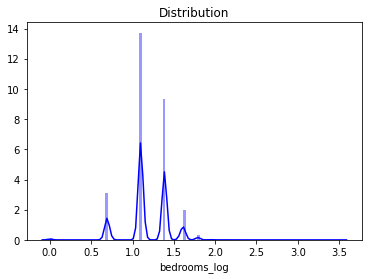

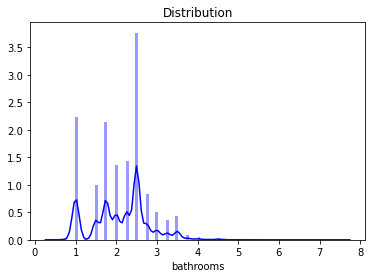

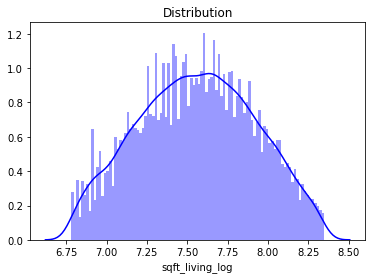

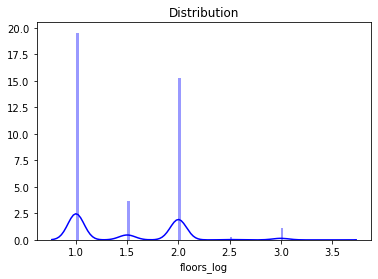

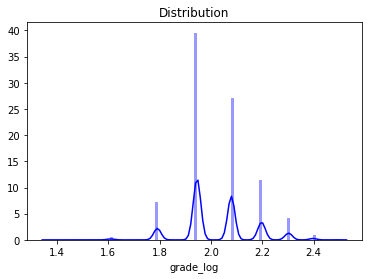

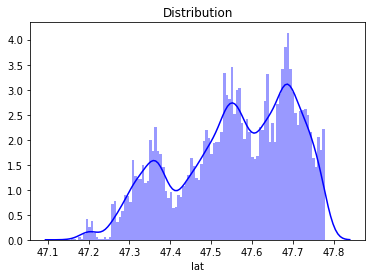

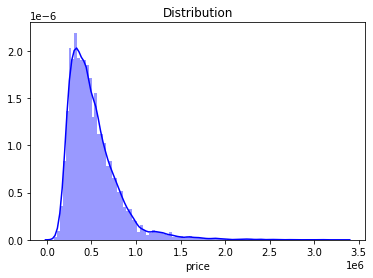

In [38]:
columns = house_data.columns
for col in columns:
    sns.distplot(house_data[col], bins = 100, 
                   color = 'blue')
    plt.title('Distribution')
    plt.show()

In [39]:
# function to normalize the data
def normalizer_data(df):
    transformer = StandardScaler().fit(df)
    df = transformer.transform(df)
    return df

In [40]:
# normalization of the data
house_data = normalizer_data(house_data)

In [41]:
# normalization of the data1 and data2
data1 = normalizer_data(data1)
data2 = normalizer_data(data2)

In [42]:
# converting arrays to dataframes
column_names = ['bedrooms_log', 'bathrooms', 'sqft_living_log', 'floors_log',
       'grade_log', 'lat', 'price']
house_data = pd.DataFrame(house_data, columns = column_names)
data1 = pd.DataFrame(data1, columns = column_names)
data2 = pd.DataFrame(data2, columns = column_names)

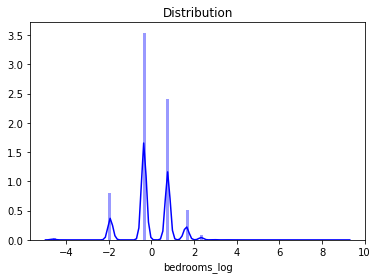

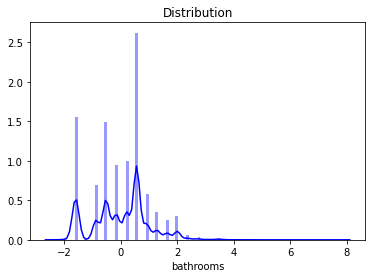

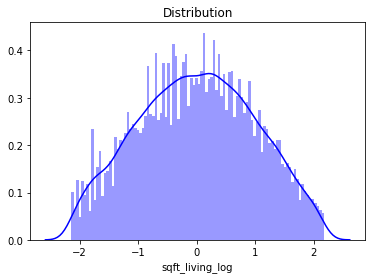

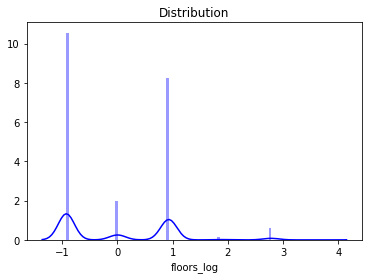

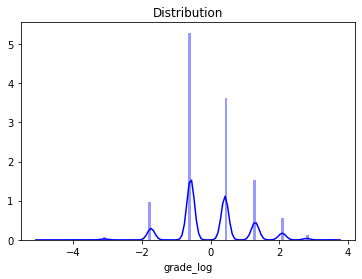

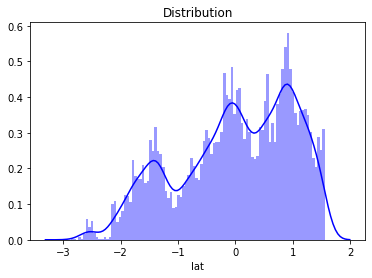

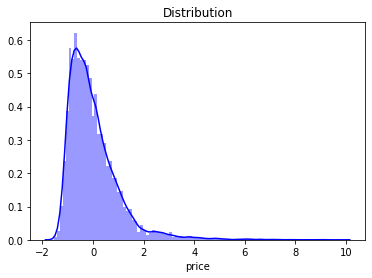

In [43]:
columns = house_data.columns
for col in columns:
    sns.distplot(house_data[col], bins = 100, 
                   color = 'blue')
    plt.title('Distribution')
    plt.show()

In [44]:
house_data

bedrooms_log  bathrooms  sqft_living_log  floors_log  grade_log  \
0         -0.354015  -1.593880        -1.337298   -0.922647  -0.585924   
1         -0.354015   0.202740         0.809474    0.930334  -0.585924   
2          0.760812   1.280712         0.062173   -0.922647  -0.585924   
3         -0.354015  -0.156584        -0.362968   -0.922647   0.413638   
4         -0.354015   0.202740        -0.306101    0.930334  -0.585924   
...             ...        ...              ...         ...        ...   
20244     -0.354015   0.562064        -0.620909    2.783315   0.413638   
20245      0.760812   0.562064         0.515315    0.930334   0.413638   
20246     -1.925274  -1.953204        -1.739166    0.930334  -0.585924   
20247     -0.354015   0.562064        -0.497529    0.930334   0.413638   
20248     -1.925274  -1.953204        -1.739166    0.930334  -0.585924   

            lat     price  
0     -0.341836 -1.043972  
1      1.153653  0.069308  
2     -0.273405  0.301754  
3      0.410898 -0.029306  
4     -1.778161 -0.918591  
...         ...       ...  
20244  0.998972 -0.557594  
20245 -0.345400 -0.416717  
20246  0.251228 -0.409318  
20247 -0.175750 -0.416717  
20248  0.249089 -0.680862  

[20249 rows x 7 columns]

In [45]:
house_data.to_csv('edited_data.csv') 

In [46]:
# seperating data to featurs and target X, y for house_data and X1, y1 and X2 and y2 for 
y = house_data['price']
X = house_data.drop(['price'], axis=1)
y1 = data1['price']
X1 = data1.drop(['price'], axis=1)
y2 = data2['price']
X2 = data2.drop(['price'], axis=1)

In [47]:
# splitting house_data, data1 and data2 to training and test sets
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=100)

In [48]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size= 0.20, random_state=100)

In [49]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size= 0.20, random_state=100)

### Modeling
Now it is time to test some models and check their performance on the dataset.
we will apply linear regression, bayesian ridge regression, selective vector regression, decision tree regression, random forest regression, gradiant boost regression

In [50]:
# Metric which we will use it later in our modeling function
# 10 Fold Cross validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)
# def rmse(y, y_pred):
#     return np.sqrt(mean_squared_error(y, y_pred))
# def cv_r2_function(model, x, y):
#     return cross_val_score(model, x, y, cv=kf, scoring='r2')
def cv_r2_function(y, y_pred):
    return r2_score(y, y_pred)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)
#Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.


def modeling_function (x_train, y_train, x_test, y_test):
    cv_r2=[]
    cv_scores=[]
    cv_std = []
    #cv_r2_std = []
    models = ['Linear_Reg.','Ridge', 'Bayesian_Ridge_Reg.','SVR','Dec.Tree.Reg.','Random_Forest_Reg.','Grad_Boost_Reg.', 'KNeighborsReg.', 'MLPReg.']
   
    # linear regression
    lreg = LinearRegression()
    score_lreg = cv_rmse(lreg)
    lreg_model = lreg.fit(x_train, y_train)
    y_pred_lreg= lreg_model.predict(x_test)
    r2_lreg = cv_r2_function(y_test,y_pred_lreg)
    cv_r2.append(r2_lreg)
    #cv_r2_std.append(r2_lreg.std())
    cv_scores.append(score_lreg.mean())
    cv_std.append(score_lreg.std())
    
    #Ridge
    rdg = Ridge()
    score_rdg = cv_rmse(rdg)
    rdg_model = lreg.fit(x_train, y_train)
    y_pred_rdg= rdg_model.predict(x_test)
    r2_rdg = cv_r2_function(y_test,y_pred_rdg)
    cv_r2.append(r2_rdg)
    #cv_r2_std.append(r2_rdg.std())
    cv_scores.append(score_rdg.mean())
    cv_std.append(score_rdg.std())
    
#     # Lasso
#     lss= Lasso(alpha = 0.01)
#     score_lss = cv_rmse(lss)
#     lss_model = lss.fit(x_train, y_train)
#     y_pred_lss= lss.predict(x_test)
#     r2_lss = cv_r2_function(y_test,y_pred_lss)
#     cv_r2.append(r2_lss.mean())
#     cv_r2_std.append(r2_lss.std())             
#     cv_scores.append(score_lss.mean())
#     cv_std.append(score_lss.std())
    
#     # ElasticNet
#     eln= ElasticNet(l1_ratio=0.5, alpha = 0.01)
#     score_eln = cv_rmse(eln)
#     eln_model = eln.fit(x_train, y_train)
#     y_pred_eln= eln.predict(x_test)
#     r2_eln = cv_r2_function(y_test,y_pred_lss)
#     cv_r2.append(r2_eln.mean())
#     #cv_r2_std.append(r2_eln.std())
#     cv_scores.append(score_eln.mean())
#     cv_std.append(score_eln.std())
 
    # brr = BayesianRidge(compute_score=True)
    brr = BayesianRidge(compute_score=True)
    score_brr = cv_rmse(brr)
    brr_model = brr.fit(x_train, y_train)
    y_pred_brr= brr.predict(x_test)
    r2_brr = cv_r2_function(y_test,y_pred_brr)
    cv_r2.append(r2_brr)
    #cv_r2_std.append(r2_brr.std())
    cv_scores.append(score_brr.mean())
    cv_std.append(score_brr.std())
    
    # Support Vector Regression
    svr = SVR()
    score_svr = cv_rmse(svr)
    svr_model = svr.fit(x_train, y_train)
    y_pred_svr = svr.predict(x_test)
    r2_svr = cv_r2_function(y_test,y_pred_brr)
    cv_r2.append(r2_svr)
    #cv_r2_std.append(r2_svr.std())
    cv_scores.append(score_svr.mean())
    cv_std.append(score_svr.std())

    # Decision Tree Regressor
    dtr = DecisionTreeRegressor()
    score_dtr = cv_rmse(dtr)
    dtr_model = dtr.fit(x_train, y_train)
    y_pred_dtr = dtr.predict(x_test)
    r2_dtr = cv_r2_function(y_test,y_pred_brr)
    cv_r2.append(r2_dtr)
    #cv_r2_std.append(r2_dtr.std())
    cv_scores.append(score_dtr.mean())
    cv_std.append(score_dtr.std())

    # Random Forest Regressor
    rfr = RandomForestRegressor()
    score_rfr = cv_rmse(rfr)
    rfr_model = rfr.fit(x_train, y_train)
    y_pred_rfr= rfr.predict(x_test)
    r2_rfr = cv_r2_function(y_test,y_pred_rfr)
    cv_r2.append(r2_rfr)
    #cv_r2_std.append(r2_rfr.std())
    cv_scores.append(score_rfr.mean())
    cv_std.append(score_rfr.std())



    # Gradient Boost Regressor
    gbr = GradientBoostingRegressor()
    score_gbr = cv_rmse(gbr)
    gbr_model = gbr.fit(x_train, y_train)
    y_pred_gbr = gbr.predict(x_test)
    r2_gbr = cv_r2_function(y_test,y_pred_gbr)
    cv_r2.append(r2_gbr)
    #cv_r2_std.append(r2_gbr.std())
    cv_scores.append(score_gbr.mean())
    cv_std.append(score_gbr.std())

    
    #KNeighborsRegressor
    KNN = KNeighborsRegressor(n_neighbors=6)
    score_KNN = cv_rmse(KNN)
    KNN_model = KNN.fit(x_train, y_train)
    y_pred_KNN = KNN.predict(x_test)
    r2_KNN = cv_r2_function(y_test,y_pred_KNN)
    cv_r2.append(r2_KNN)
    #cv_r2_std.append(r2_KNN.std())
    cv_scores.append(score_KNN.mean())
    cv_std.append(score_KNN.std())

    #MLPRegressor 
    MLP = MLPRegressor()
    score_MLP = cv_rmse(MLP)
    MLP_model = MLP.fit(x_train, y_train)
    y_pred_MLP= MLP.predict(x_test)
    r2_MLP = cv_r2_function(y_test,y_pred_MLP)
    cv_r2.append(r2_MLP)
    #cv_r2_std.append(r2_MLP.std())
    cv_scores.append(score_MLP.mean())
    cv_std.append(score_MLP.std())

    final_cv_score = pd.DataFrame(models, columns = ['Regressors'])
    print(final_cv_score)
    final_cv_score['RMSE_mean'] = cv_scores
    final_cv_score['RMSE_std'] = cv_std
    final_cv_score['R2'] = cv_r2
    #final_cv_score['R2_std'] = cv_r2_std
    return final_cv_score


In [51]:
final_cv_score = modeling_function (x_train, y_train, x_test, y_test)

            Regressors
0          Linear_Reg.
1                Ridge
2  Bayesian_Ridge_Reg.
3                  SVR
4        Dec.Tree.Reg.
5   Random_Forest_Reg.
6      Grad_Boost_Reg.
7       KNeighborsReg.
8              MLPReg.


In [52]:
final_cv_score

Regressors  RMSE_mean  RMSE_std        R2
0          Linear_Reg.   0.682522  0.027997  0.535025
1                Ridge   0.682522  0.027997  0.535025
2  Bayesian_Ridge_Reg.   0.682522  0.028002  0.535021
3                  SVR   0.563158  0.025959  0.535021
4        Dec.Tree.Reg.   0.748393  0.019042  0.535021
5   Random_Forest_Reg.   0.546862  0.024508  0.714793
6      Grad_Boost_Reg.   0.535985  0.026589  0.719473
7       KNeighborsReg.   0.579768  0.027731  0.681526
8              MLPReg.   0.537786  0.025305  0.723451

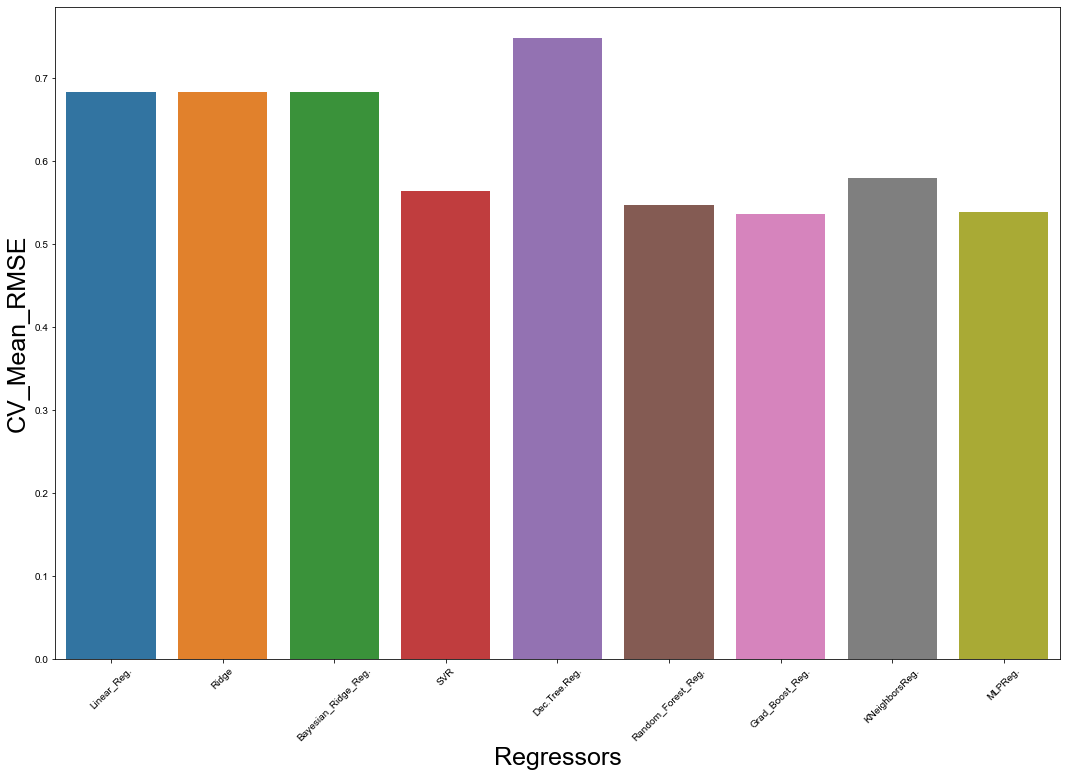

In [53]:
plt.figure(figsize = (18,12))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
sns.set(font_scale = 2)
plt.xlabel('Regressors', fontsize = 25)
plt.ylabel('CV_Mean_RMSE', fontsize = 25)
plt.xticks(rotation=45)
plt.show()

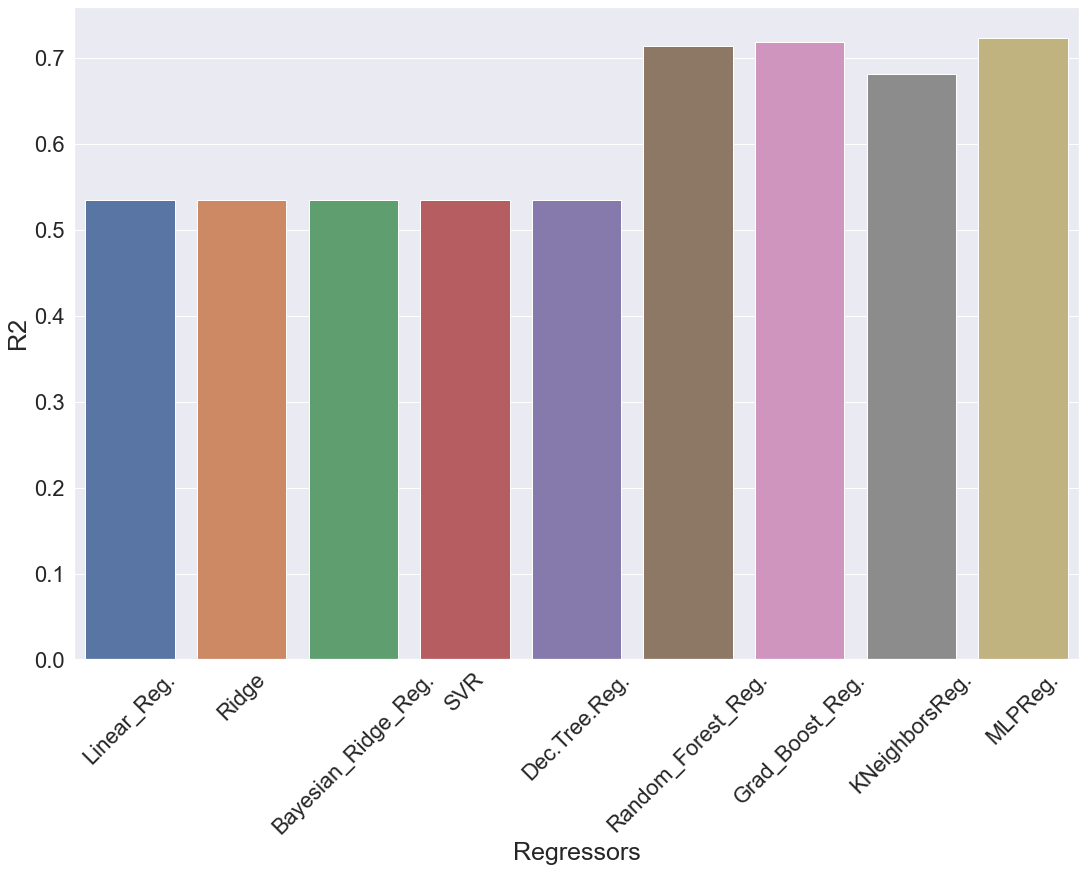

In [54]:
plt.figure(figsize = (18,12))
sns.barplot(final_cv_score['Regressors'],final_cv_score['R2'])
sns.set(font_scale = 2)
plt.xlabel('Regressors', fontsize = 25)
plt.ylabel('R2', fontsize = 25)
plt.xticks(rotation=45)
plt.show()

In [55]:
house_data.columns

Index(['bedrooms_log', 'bathrooms', 'sqft_living_log', 'floors_log',
       'grade_log', 'lat', 'price'],
      dtype='object')

In [56]:
# plotting and checking prediction and the actual price for training and test set for linear regression model
lreg = LinearRegression()
lreg_model = lreg.fit(x_train, y_train)
y_pred = lreg_model.predict(x_test)
y_pred_train = lreg_model.predict(x_train)

In [57]:
r2 = r2_score(y_test,y_pred)
r2_train = r2_score(y_train,y_pred_train)

In [58]:
r2

0.5350248401031756

In [59]:
r2_train

0.5325828461474862

In [60]:
columns= ['bedrooms_log', 'bathrooms', 'sqft_living_log', 'floors_log',
       'grade_log', 'lat']
lreg_coefficient = pd.DataFrame()
lreg_coefficient['feature'] = columns
lreg_coefficient['importance'] = lreg_model.coef_
lreg_coefficient

feature  importance
0     bedrooms_log   -0.058183
1        bathrooms   -0.003748
2  sqft_living_log    0.374818
3       floors_log   -0.051152
4        grade_log    0.366146
5              lat    0.318515

In [61]:
# residuals for train and test
residual_train = (y_train-y_pred_train)
residual_test = (y_test-y_pred)

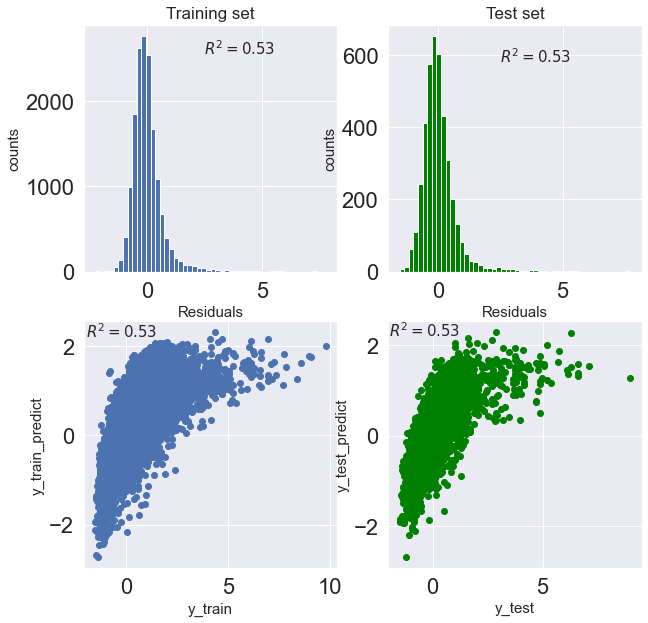

In [62]:
# visual check of the fitting by linear regression model
fig, ax = plt.subplots (2,2, figsize = (10,10))

ax[0,0].set_title('Training set', fontsize = 17)
ax[0,1].set_title('Test set', fontsize = 17)

ax[0,0].set_xlabel('Residuals', fontsize = 15)
ax[0,0].set_ylabel('counts', fontsize = 15)
ax[0,1].set_xlabel('Residuals', fontsize = 15)
ax[0,1].set_ylabel('counts', fontsize = 15)
ax[1,0].set_xlabel('y_train', fontsize = 15)
ax[1,0].set_ylabel('y_train_predict', fontsize = 15)
ax[1,1].set_xlabel('y_test', fontsize = 15)
ax[1,1].set_ylabel('y_test_predict', fontsize = 15)


ax[0,0].hist(residual_train, bins = 50)
ax[0,0].text(2.5, 2550,'$R^2 = 0.53$', fontsize = 15)
ax[0,1].hist(residual_test, bins = 50, color = 'green')
ax[0,1].text(2.5, 580,'$R^2 = 0.53$', fontsize = 15)

ax[1,0].scatter(x = y_train, y = y_pred_train)
ax[1,0].text(-2, 2.2,'$R^2 = 0.53$', fontsize = 15)
ax[1,1].scatter(x = y_test, y = y_pred, color = 'green' )
ax[1,1].text(-2, 2.2,'$R^2 = 0.53$', fontsize = 15)
plt.show()

The R2_score is ok but the predicted data points do not show linear behavior with the actual one. This deviation is more observable for higher prices. It could be because of skewness of the target. We will check the result after log transform of the target, price. Since some prices are so large leading to undefined value after log_transformation. We will test it just on data1 ( the bucket of dataset after removing outliers from house prices).

In [63]:
# Since log0 is undefined, it should also be removed from the dataset
data1_log_check = data1[data1['price'] > 0]
data1_log = data1_log_check.copy()

In [64]:
# data1_log = np.log1p(data1_log['price'])

In [65]:
# data1_log = data1_log.rename({'price': 'price_log'}, inplace = True)

In [66]:
# y2_log =data1_log['price_log']
# X2_log = data1_log.drop(['price_log'],axis = 1)

In [67]:
data1_log_check['price'] = np.log(data1_log_check['price'])

In [68]:
data1_log_check.rename(columns={'price': 'price_log'}, inplace = True)

In [69]:
data1_log_check

bedrooms_log  bathrooms  sqft_living_log  floors_log  grade_log  \
1         -0.339919   0.240714         0.882850    0.940981  -0.570153   
2          0.781101   1.353253         0.107570   -0.913139  -0.570153   
3         -0.339919  -0.130132        -0.333489   -0.913139   0.492081   
8         -0.339919   0.611561         1.815192   -0.913139   0.492081   
12         1.650632  -0.130132        -0.120234    0.013921  -0.570153   
...             ...        ...              ...         ...        ...   
19165      0.781101   0.611561         1.435884    0.940981   1.429039   
19166      0.781101   1.353253         2.141459    0.940981   1.429039   
19169     -0.339919   0.611561         0.527698    0.940981   0.492081   
19171      0.781101   0.611561         0.826636    0.940981   1.429039   
19172      0.781101   2.094945         1.774721    0.940981   1.429039   

            lat  price_log  
1      1.148360  -1.295628  
2     -0.265294  -0.502351  
3      0.412582  -2.016351  
8      0.298897  -0.106662  
12     0.788239  -1.454322  
...         ...        ...  
19165 -1.873131  -1.228247  
19166  0.899100   0.494339  
19169 -0.137486  -2.125838  
19171 -0.315428  -0.448366  
19172 -0.032980   0.972140  

[8283 rows x 7 columns]

In [70]:
y1_log =data1_log_check['price_log']
X1_log = data1_log_check.drop(['price_log'],axis = 1)

In [71]:
# splitting the data to check the result after log_transform of the target
x_train3, x_test3, y_train3, y_test3 = train_test_split(X1_log,y1_log, test_size= 0.20, random_state=100)

In [72]:
y_test3

5739    -0.579965
10817    0.701107
18672    0.933395
10364    0.159112
15853   -1.782086
           ...   
9205    -2.489743
10389   -2.016351
11387   -0.453766
9011     0.829483
1475    -0.934015
Name: price_log, Length: 1657, dtype: float64

In [73]:
# plotting and checking prediction and the actual price for training and test set after log_transform of the target
lreg_log = lreg.fit(x_train3, y_train3)
y_pred_log = lreg_log.predict(x_test3)
y_pred_train_log = lreg_log.predict(x_train3)
y_pred_log

array([-1.06779713, -0.8960798 ,  0.28123584, ..., -0.11624466,
       -0.10796909, -0.83137543])

In [74]:
r2_afterlog = r2_score(y_test3,y_pred_log)
r2_train_afterlog = r2_score(y_train3,y_pred_train_log)

In [75]:
r2_afterlog

0.18143819565574448

In [76]:
r2_train_afterlog

0.19158340967448784

In [77]:
# residuals for train and test
residual_train_log = (y_train3-y_pred_train_log)
residual_test_log = (y_test3-y_pred_log)

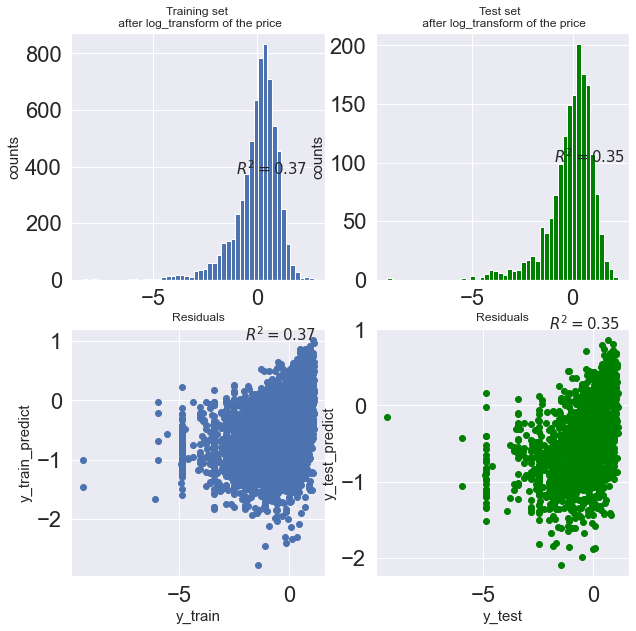

In [83]:
# visual check of the fitting by linear regression model after log_transform of the target 
fig, ax = plt.subplots (2,2, figsize = (10,10))

ax[0,0].set_title('Training set \n after log_transform of the price', fontsize = 12)
ax[0,1].set_title('Test set  \n after log_transform of the price', fontsize = 12)

ax[0,0].set_xlabel('Residuals', fontsize = 12)
ax[0,0].set_ylabel('counts', fontsize = 15)
ax[0,1].set_xlabel('Residuals', fontsize = 12)
ax[0,1].set_ylabel('counts', fontsize = 15)
ax[1,0].set_xlabel('y_train', fontsize = 15)
ax[1,0].set_ylabel('y_train_predict', fontsize = 15)
ax[1,1].set_xlabel('y_test', fontsize = 15)
ax[1,1].set_ylabel('y_test_predict', fontsize = 15)


ax[0,0].hist(residual_train_log, bins = 50)
ax[0,0].text(-1, 370,'$R^2 = 0.37$', fontsize = 15)
ax[0,1].hist(residual_test_log, bins = 50, color = 'green')
ax[0,1].text(-0.9, 100,'$R^2 = 0.35$', fontsize = 15)

ax[1,0].scatter(x = y_train3, y = y_pred_train_log)
ax[1,0].text(-2, 1,'$R^2 = 0.37$', fontsize = 15)
ax[1,1].scatter(x = y_test3, y = y_pred_log, color = 'green' )
ax[1,1].text(-2, 1,'$R^2 = 0.35$', fontsize = 15)
plt.show()

Now the actual data points show linear behaviour with the predicted one. However, the R2 becomes worse.

In [79]:
# visual check of the fitting by Random forest regressor
rfr = RandomForestRegressor()
rfr_model = rfr.fit(x_train, y_train)
y_pred_rfr = rfr_model.predict(x_test)
y_pred_train_rfr = rfr_model.predict(x_train)
r2_rfr = r2_score(y_test,y_pred_rfr)
r2_train_rfr = r2_score(y_train,y_pred_train_rfr)
r2_rfr, r2_train_rfr

(0.7155349343152354, 0.9573885508639665)

In [87]:
# residuals for train and test
residual_train_rfr = (y_train-y_pred_train_rfr)
residual_test_rfr = (y_test-y_pred_rfr)

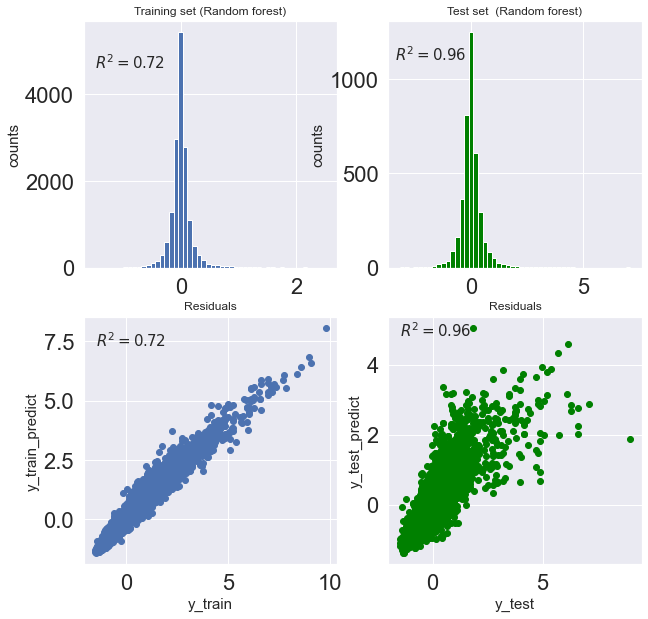

In [113]:
# visual check of the fitting by Random forest regressor
fig, ax = plt.subplots (2,2, figsize = (10,10))

ax[0,0].set_title('Training set (Random forest)', fontsize = 12)
ax[0,1].set_title('Test set  (Random forest)', fontsize = 12)

ax[0,0].set_xlabel('Residuals', fontsize = 12)
ax[0,0].set_ylabel('counts', fontsize = 15)
ax[0,1].set_xlabel('Residuals', fontsize = 12)
ax[0,1].set_ylabel('counts', fontsize = 15)
ax[1,0].set_xlabel('y_train', fontsize = 15)
ax[1,0].set_ylabel('y_train_predict', fontsize = 15)
ax[1,1].set_xlabel('y_test', fontsize = 15)
ax[1,1].set_ylabel('y_test_predict', fontsize = 15)


ax[0,0].hist(residual_train_rfr, bins = 50)
ax[0,0].text(-1.5, 4600,'$R^2 = 0.72$', fontsize = 15)
ax[0,1].hist(residual_test_rfr, bins = 50, color = 'green')
ax[0,1].text(-3.4, 1100,'$R^2 = 0.96$', fontsize = 15)

ax[1,0].scatter(x = y_train, y = y_pred_train_rfr)
ax[1,0].text(-1.5, 7.3,'$R^2 = 0.72$', fontsize = 15)
ax[1,1].scatter(x = y_test, y = y_pred_rfr, color = 'green' )
ax[1,1].text(-1.5, 4.8,'$R^2 = 0.96$', fontsize = 15)
plt.show()

rfr results in a good r2_score. However, occurence of overfitting is clear

In [114]:
# visual check of the fitting by MLP regression
MLP = MLPRegressor()
MLP_model = MLP.fit(x_train, y_train)
y_pred_MLP = MLP_model.predict(x_test)
y_pred_train_MLP = MLP_model.predict(x_train)
r2_MLP = r2_score(y_test,y_pred_MLP)
r2_train_MLP = r2_score(y_train,y_pred_train_MLP)
r2_MLP, r2_train_MLP

(0.7246186583733938, 0.7259612729641605)

In [115]:
# residuals for train and test
residual_train_MLP = (y_train-y_pred_train_MLP)
residual_test_MLP = (y_test-y_pred_MLP)

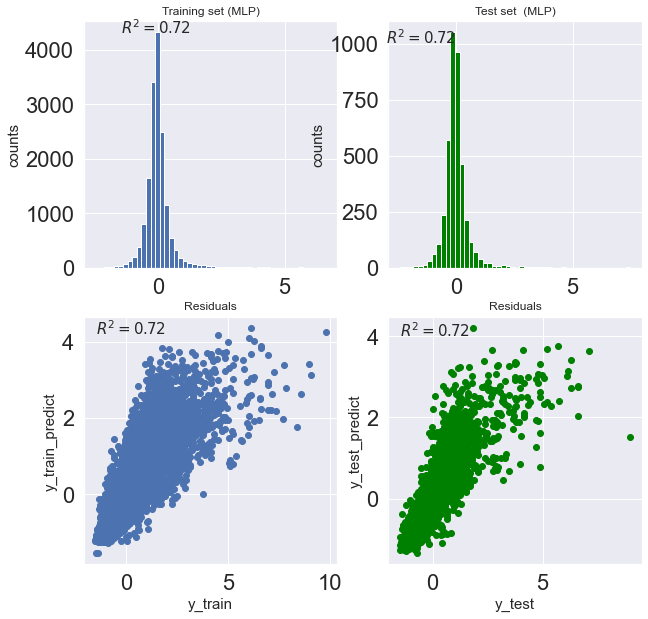

In [124]:
# visual check of the fitting by MLP regressor
fig, ax = plt.subplots (2,2, figsize = (10,10))

ax[0,0].set_title('Training set (MLP)', fontsize = 12)
ax[0,1].set_title('Test set  (MLP)', fontsize = 12)

ax[0,0].set_xlabel('Residuals', fontsize = 12)
ax[0,0].set_ylabel('counts', fontsize = 15)
ax[0,1].set_xlabel('Residuals', fontsize = 12)
ax[0,1].set_ylabel('counts', fontsize = 15)
ax[1,0].set_xlabel('y_train', fontsize = 15)
ax[1,0].set_ylabel('y_train_predict', fontsize = 15)
ax[1,1].set_xlabel('y_test', fontsize = 15)
ax[1,1].set_ylabel('y_test_predict', fontsize = 15)


ax[0,0].hist(residual_train_MLP, bins = 50)
ax[0,0].text(-1.5, 4300,'$R^2 = 0.72$', fontsize = 15)
ax[0,1].hist(residual_test_MLP, bins = 50, color = 'green')
ax[0,1].text(-3, 1000,'$R^2 = 0.72$', fontsize = 15)

ax[1,0].scatter(x = y_train, y = y_pred_train_MLP)
ax[1,0].text(-1.5, 4.2,'$R^2 = 0.72$', fontsize = 15)
ax[1,1].scatter(x = y_test, y = y_pred_MLP, color = 'green' )
ax[1,1].text(-1.5, 4,'$R^2 = 0.72$', fontsize = 15)
plt.show()

In [126]:
# checking feature importance for rfr
columns= ['bedrooms_log', 'bathrooms', 'sqft_living_log', 'floors_log',
       'grade_log', 'lat']
rfr_coefficient = pd.DataFrame()
rfr_coefficient['feature'] = columns
rfr_coefficient['importance'] = rfr_model.feature_importances_
rfr_coefficient

feature  importance
0     bedrooms_log    0.025023
1        bathrooms    0.046261
2  sqft_living_log    0.211882
3       floors_log    0.024875
4        grade_log    0.342667
5              lat    0.349292

In [129]:
# visual check of the fitting by gradient boost regression
gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(x_train, y_train)
y_pred_gbr = gbr_model.predict(x_test)
y_pred_train_gbr = gbr_model.predict(x_train)
r2_gbr = r2_score(y_test,y_pred_gbr)
r2_train_gbr = r2_score(y_train,y_pred_train_gbr)
r2_gbr, r2_train_gbr

(0.7194676208661916, 0.7347799801948127)

In [130]:
# residuals for train and test
residual_train_gbr = (y_train-y_pred_train_gbr)
residual_test_gbr = (y_test-y_pred_gbr)

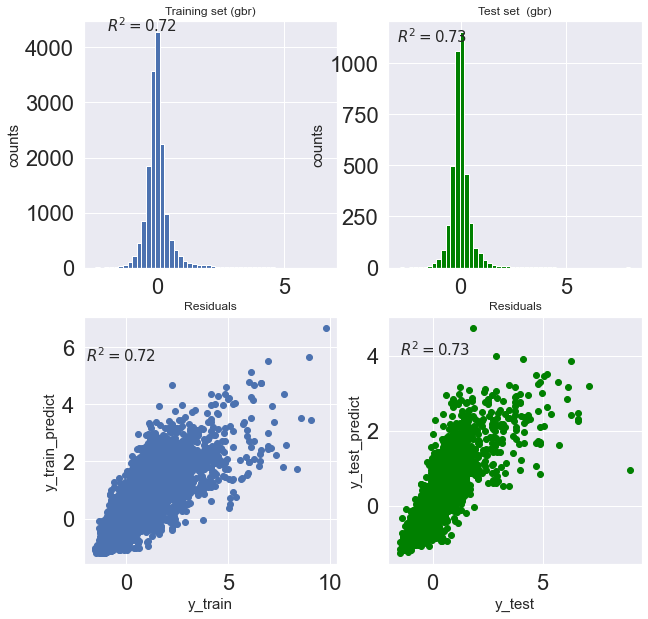

In [137]:
# visual check of the fitting by MLP regressor
fig, ax = plt.subplots (2,2, figsize = (10,10))

ax[0,0].set_title('Training set (gbr)', fontsize = 12)
ax[0,1].set_title('Test set  (gbr)', fontsize = 12)

ax[0,0].set_xlabel('Residuals', fontsize = 12)
ax[0,0].set_ylabel('counts', fontsize = 15)
ax[0,1].set_xlabel('Residuals', fontsize = 12)
ax[0,1].set_ylabel('counts', fontsize = 15)
ax[1,0].set_xlabel('y_train', fontsize = 15)
ax[1,0].set_ylabel('y_train_predict', fontsize = 15)
ax[1,1].set_xlabel('y_test', fontsize = 15)
ax[1,1].set_ylabel('y_test_predict', fontsize = 15)


ax[0,0].hist(residual_train_gbr, bins = 50)
ax[0,0].text(-2, 4300,'$R^2 = 0.72$', fontsize = 15)
ax[0,1].hist(residual_test_gbr, bins = 50, color = 'green')
ax[0,1].text(-3, 1100,'$R^2 = 0.73$', fontsize = 15)

ax[1,0].scatter(x = y_train, y = y_pred_train_gbr)
ax[1,0].text(-2, 5.5,'$R^2 = 0.72$', fontsize = 15)
ax[1,1].scatter(x = y_test, y = y_pred_gbr, color = 'green' )
ax[1,1].text(-1.5, 4,'$R^2 = 0.73$', fontsize = 15)
plt.show()

In [139]:
# checking feature importance for gbr
gbr_coefficient = pd.DataFrame()
gbr_coefficient['feature'] = columns
gbr_coefficient['importance'] = gbr_model.feature_importances_
gbr_coefficient

feature  importance
0     bedrooms_log    0.002364
1        bathrooms    0.009391
2  sqft_living_log    0.268380
3       floors_log    0.012011
4        grade_log    0.359996
5              lat    0.347858